# Feature Engineering & KNN for FiveThirtyEight College Majors Dataset

https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/recent-grads.csv')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [ ]:
# Look at how many missing values are in this dataset:
print("Missing Values:")
print(data.isnull().sum())

# The number of missing values is very small in each feature, so we do not need
# to worrying about removing features containing to many NAs. Instead, we directly
# dropped those few NA values which won't affect the general result
data_cleaned = data.dropna()

print("Cleaned Dataset:")
print(data_cleaned.head())

print("Summary Statistics of Cleaned Data:")
print(data_cleaned.describe())

Missing Values:
Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64
Cleaned Dataset:
   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405              

In [ ]:
data_cleaned

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [ ]:
import pandas as pd


# Group data by "Major"
grouped_data = data.groupby('Major')

# Engineering features by
new_features = grouped_data.agg({
    'Median': 'mean',
    'Employed': 'mean',
    'College_jobs': 'mean',
    'Unemployment_rate': 'mean'
}).reset_index()

new_features.columns = ['Major', 'Average_Earnings', 'Average_Employment', 'Average_High_Wage_Job', 'Average_Unemployment_Rate']

In [ ]:
new_features = new_features.dropna()

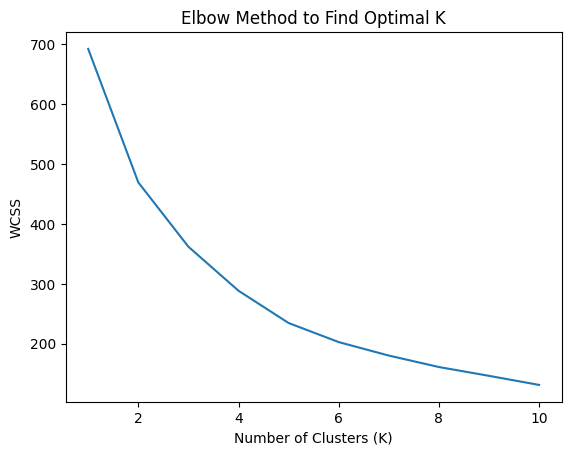

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


scaler = StandardScaler()
scaled_features = scaler.fit_transform(new_features.iloc[:, 1:])



wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal K')
plt.show()


In [ ]:
# Train the K-means model
k = 3  # You can adjust this based on your elbow method analysis
kmeans = KMeans(n_clusters=k, random_state=42)
new_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_data = pd.DataFrame(cluster_centers, columns=new_features.columns[1:-1])
new_features['Cluster'] = new_features['Cluster'] + 1  # Start cluster numbering from 1



In [ ]:
from sklearn.metrics import silhouette_score

# evaluate clustering
inertia = kmeans.inertia_ # Sum of squared distances of samples to their closest cluster center, the lower the better
print("Inertia:", inertia)
labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_features, labels) # Silhouette Coefficient, the higher the better (Silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation))
print("Silhouette Score:", silhouette_avg)


Inertia: 361.9359031576776
Silhouette Score: 0.3095801085903805


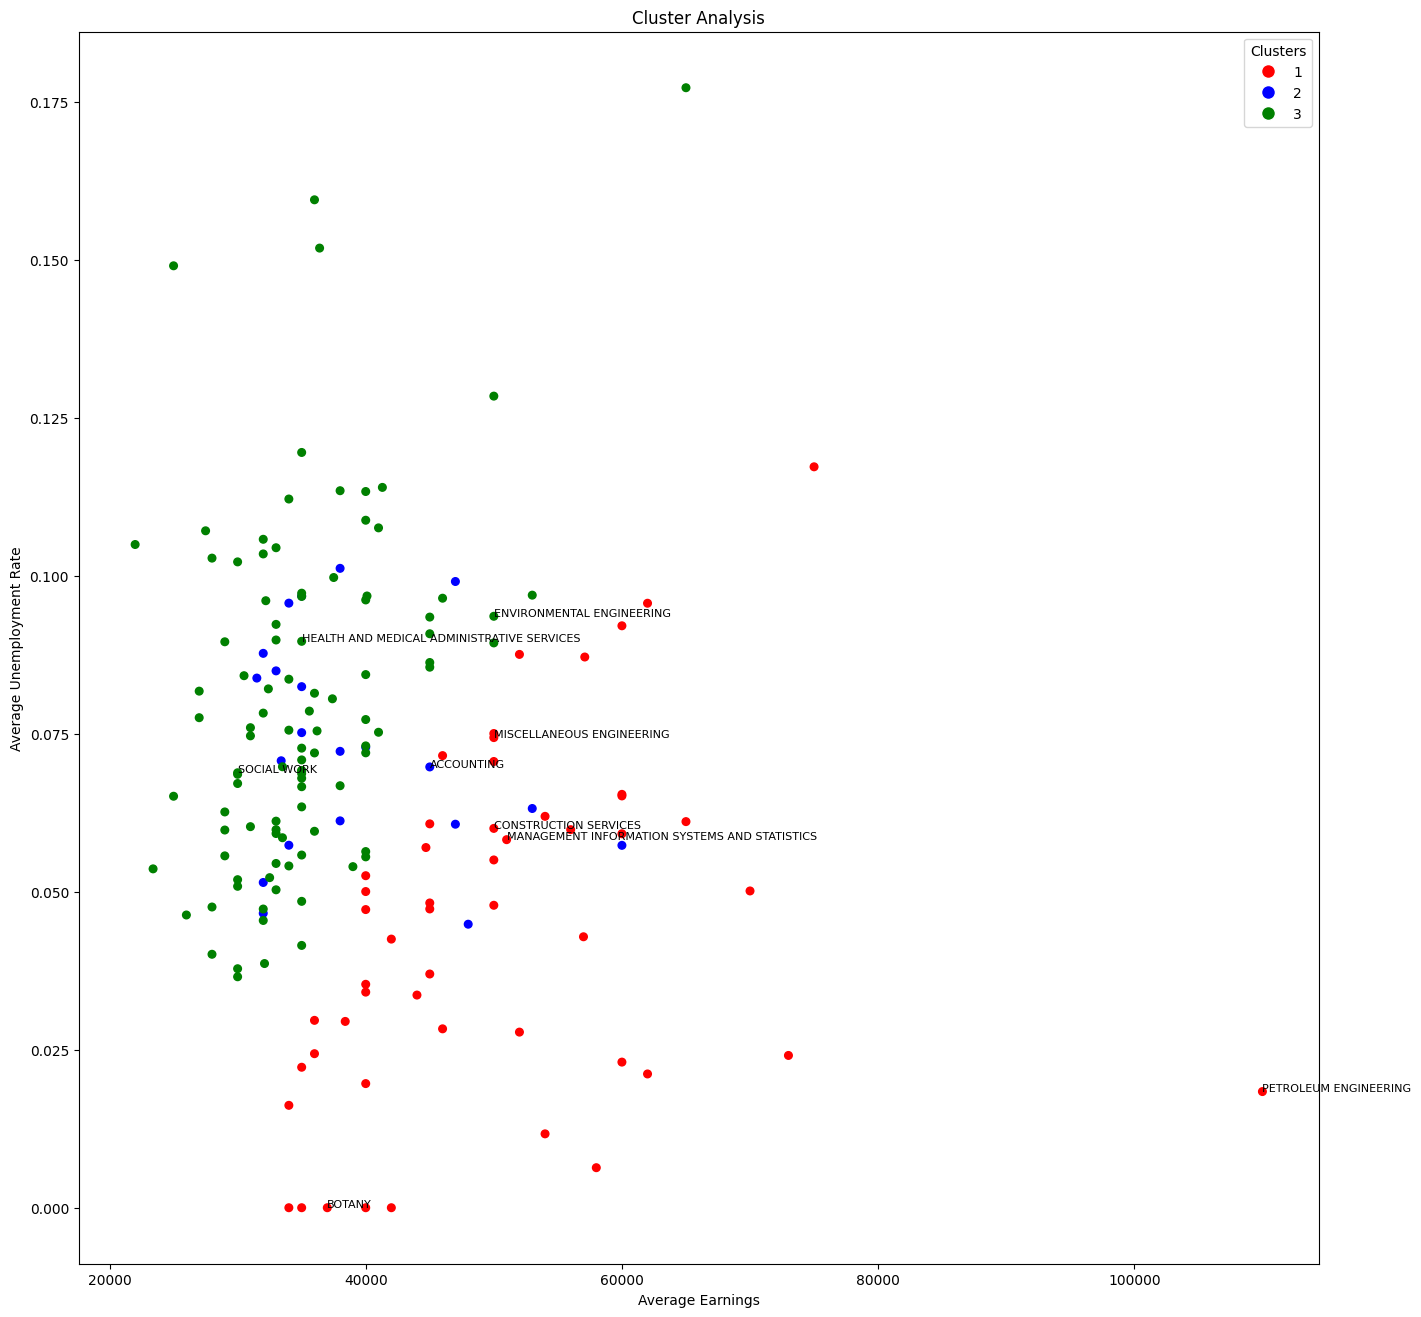

In [ ]:

cluster_colors = {
    1: 'red',
    2: 'blue',
    3: 'green'
}


# Visualize the clusters (example for two features)
plt.figure(figsize=(16, 16))  # We can change the figure size
# scatter = plt.scatter(new_features['Average_Earnings'], new_features['Average_Unemployment_Rate'], c=new_features['Cluster'], cmap='viridis', s=30)
scatter = plt.scatter(new_features['Average_Earnings'], new_features['Average_Unemployment_Rate'], c=new_features['Cluster'].map(cluster_colors), s=30)

plt.xlabel('Average Earnings')
plt.ylabel('Average Unemployment Rate')
plt.title('Cluster Analysis')

for i, row in new_features.iterrows():
    if i % 20 == 0:  # To avoid clutter, annotate every 20th point
      plt.annotate(row['Major'], (row['Average_Earnings'], row['Average_Unemployment_Rate']), fontsize=8)

cluster_names = ['Cluster A', 'Cluster B', 'Cluster C']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=name) for name, color in cluster_colors.items()]
plt.legend(handles=legend_elements, title='Clusters', fontsize=10)

plt.show()

cluster_stats = new_features.groupby('Cluster').mean()

best_clusters = cluster_stats.sort_values(by=['Average_Earnings', 'Average_Unemployment_Rate'], ascending=[False, True])

# Get the top N clusters with the best career prospects
n_top_clusters = 2
top_clusters = best_clusters.head(n_top_clusters)

# Find the majors within the top clusters
best_majors = new_features[new_features['Cluster'].isin(top_clusters.index)]


In [ ]:
best_majors

,Major,Average_Earnings,Average_Employment,Average_High_Wage_Job,Average_Unemployment_Rate,Cluster
0,ACCOUNTING,45000.0,165527.0,11417.0,0.069749,2
1,ACTUARIAL SCIENCE,62000.0,2912.0,1768.0,0.095652,1
3,AEROSPACE ENGINEERING,60000.0,11391.0,8184.0,0.065162,1
5,AGRICULTURE PRODUCTION AND MANAGEMENT,40000.0,12323.0,1925.0,0.050031,1
9,ARCHITECTURAL ENGINEERING,54000.0,2575.0,1665.0,0.061931,1
...,...,...,...,...,...,...
152,PSYCHOLOGY,31500.0,307933.0,125148.0,0.083811,2
158,SOCIAL PSYCHOLOGY,36000.0,1080.0,434.0,0.029650,1
161,SOCIOLOGY,33000.0,92721.0,29051.0,0.084951,2
162,SOIL SCIENCE,35000.0,613.0,355.0,0.000000,1


In [ ]:
#  majors that belong to cluster 1
new_features[new_features['Cluster'] == 1]['Major'].tolist()

['ACTUARIAL SCIENCE',
 'AEROSPACE ENGINEERING',
 'AGRICULTURE PRODUCTION AND MANAGEMENT',
 'ARCHITECTURAL ENGINEERING',
 'ASTRONOMY AND ASTROPHYSICS',
 'ATMOSPHERIC SCIENCES AND METEOROLOGY',
 'BIOLOGICAL ENGINEERING',
 'BIOMEDICAL ENGINEERING',
 'BOTANY',
 'CHEMICAL ENGINEERING',
 'CIVIL ENGINEERING',
 'COMPUTER ENGINEERING',
 'CONSTRUCTION SERVICES',
 'COURT REPORTING',
 'EDUCATIONAL ADMINISTRATION AND SUPERVISION',
 'ELECTRICAL ENGINEERING',
 'ELECTRICAL ENGINEERING TECHNOLOGY',
 'ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLOGIES AND PRODUCTION',
 'ENGINEERING AND INDUSTRIAL MANAGEMENT',
 'ENGINEERING MECHANICS PHYSICS AND SCIENCE',
 'ENGINEERING TECHNOLOGIES',
 'GENERAL AGRICULTURE',
 'GENERAL ENGINEERING',
 'GENETICS',
 'GEOLOGICAL AND GEOPHYSICAL ENGINEERING',
 'GEOSCIENCES',
 'INDUSTRIAL AND MANUFACTURING ENGINEERING',
 'INDUSTRIAL PRODUCTION TECHNOLOGIES',
 'INFORMATION SCIENCES',
 'MANAGEMENT INFORMATION SYSTEMS AND STATISTICS',
 'MATERIALS ENGINEERING AND MATERIALS SCIENCE',

In [ ]:
#  majors that belong to cluster 2
new_features[new_features['Cluster'] == 2]['Major'].tolist()

['ACCOUNTING',
 'BIOLOGY',
 'BUSINESS MANAGEMENT AND ADMINISTRATION',
 'COMMERCIAL ART AND GRAPHIC DESIGN',
 'COMMUNICATIONS',
 'COMPUTER SCIENCE',
 'CRIMINAL JUSTICE AND FIRE PROTECTION',
 'ECONOMICS',
 'ELEMENTARY EDUCATION',
 'ENGLISH LANGUAGE AND LITERATURE',
 'FINANCE',
 'GENERAL BUSINESS',
 'GENERAL EDUCATION',
 'HISTORY',
 'MARKETING AND MARKETING RESEARCH',
 'MECHANICAL ENGINEERING',
 'NURSING',
 'PHYSICAL FITNESS PARKS RECREATION AND LEISURE',
 'POLITICAL SCIENCE AND GOVERNMENT',
 'PSYCHOLOGY',
 'SOCIOLOGY']

In [ ]:
#  c3
new_features[new_features['Cluster'] == 3]['Major'].tolist()

['ADVERTISING AND PUBLIC RELATIONS',
 'AGRICULTURAL ECONOMICS',
 'ANIMAL SCIENCES',
 'ANTHROPOLOGY AND ARCHEOLOGY',
 'APPLIED MATHEMATICS',
 'ARCHITECTURE',
 'AREA ETHNIC AND CIVILIZATION STUDIES',
 'ART AND MUSIC EDUCATION',
 'ART HISTORY AND CRITICISM',
 'BIOCHEMICAL SCIENCES',
 'BUSINESS ECONOMICS',
 'CHEMISTRY',
 'CLINICAL PSYCHOLOGY',
 'COGNITIVE SCIENCE AND BIOPSYCHOLOGY',
 'COMMUNICATION DISORDERS SCIENCES AND SERVICES',
 'COMMUNICATION TECHNOLOGIES',
 'COMMUNITY AND PUBLIC HEALTH',
 'COMPOSITION AND RHETORIC',
 'COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY',
 'COMPUTER AND INFORMATION SYSTEMS',
 'COMPUTER NETWORKING AND TELECOMMUNICATIONS',
 'COMPUTER PROGRAMMING AND DATA PROCESSING',
 'COSMETOLOGY SERVICES AND CULINARY ARTS',
 'COUNSELING PSYCHOLOGY',
 'CRIMINOLOGY',
 'DRAMA AND THEATER ARTS',
 'EARLY CHILDHOOD EDUCATION',
 'ECOLOGY',
 'EDUCATIONAL PSYCHOLOGY',
 'ENVIRONMENTAL ENGINEERING',
 'ENVIRONMENTAL SCIENCE',
 'FAMILY AND CONSUMER SCIENCES',
 'FILM VIDEO AND PHOTOGRA

In [ ]:
cluster_stats

,Average_Earnings,Average_Employment,Average_High_Wage_Job,Average_Unemployment_Rate
Cluster,,,,
1,50350.00000,9991.711538,5753.576923,0.044346
2,39090.47619,150021.285714,53248.047619,0.073100
3,35071.00000,17263.320000,7144.210000,0.079559


In [ ]:
top_clusters

,Average_Earnings,Average_Employment,Average_High_Wage_Job,Average_Unemployment_Rate
Cluster,,,,
1,50350.00000,9991.711538,5753.576923,0.044346
2,39090.47619,150021.285714,53248.047619,0.073100


# Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load and preprocess data
data = pd.read_csv('/content/recent-grads.csv')
data = pd.get_dummies(data, columns=['Major_category'])

# Convert count data to rate so sample size difference doesn't matter
features_to_rate = list(['Employed', 'College_jobs','Non_college_jobs','Low_wage_jobs','Full_time','Part_time','Full_time_year_round'])

for feature in features_to_rate:
  data[feature+'_rate'] = data[feature] / data['Total']

data = data.dropna()

# Drop repeated terms
data_new = data.drop(features_to_rate, axis=1)
data_new = data_new.drop(['Unemployed','Men','Women'], axis = 1)
# Separate features and target variable
data_new = data_new.drop(['Median', 'Major', 'Major_code', 'P75th', 'P25th', 'Rank'], axis=1)
X = data_new

In [ ]:
# Baseline Model: linear regression evaluated on median

# Target feature: Median
y = data['Median']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_test)

# RandomForestRegressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Compare Mean Squared Error
mse_linear = mean_squared_error(y_test, y_linear_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)

print("Linear Regression Mean Squared Error:", mse_linear)
print("Random Forest Regressor Mean Squared Error:", mse_rf)

Linear Regression Mean Squared Error: 38431148.9896508
Random Forest Regressor Mean Squared Error: 34803319.82857143


In [ ]:
# Baseline Model: linear regression evaluated on 25th percentile

# Target feature: 25th percentile
y = data['P25th']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_test)

# RandomForestRegressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Compare Mean Squared Error
mse_linear = mean_squared_error(y_test, y_linear_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)

print("Linear Regression Mean Squared Error:", mse_linear)
print("Random Forest Regressor Mean Squared Error:", mse_rf)

Linear Regression Mean Squared Error: 35220566.556220874
Random Forest Regressor Mean Squared Error: 27517843.971428573


In [ ]:
# Baseline Model: linear regression evaluated on 75th percentile

# Target feature: 75th percentile
y = data['P75th']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_test)

# RandomForestRegressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Compare Mean Squared Error
mse_linear = mean_squared_error(y_test, y_linear_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)

print("Linear Regression Mean Squared Error:", mse_linear)
print("Random Forest Regressor Mean Squared Error:", mse_rf)

Linear Regression Mean Squared Error: 46690033.42683783
Random Forest Regressor Mean Squared Error: 55198551.68571428


Random Forest performs better than the baseline linear regression model when predicting the median and 25th percentile earning but performs worse when predicting the 75th percentile earning.

Use the Random Forest model to predict the following features based on Major Categories:\
 'Employed_rate', 'College_jobs_rate', 'Low_wage_jobs_rate', 'Full_time_rate', 'Part_time_rate', 'Unemployment_rate', 'Median', 'P75th', 'P25th'\
Determines the majors (within the test dataset) that have the highest predicted value of the tested feature and give information on the feature importance of major categories in determining each target feature.

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings

warnings.filterwarnings("ignore")

# Use GridSearchCV to find the best hyperparameters for the random forest regressor

target_variables = ['Unemployment_rate', 'Median', 'P75th', 'P25th']

for target_variable in target_variables:
    print(f"\nTarget Variable: {target_variable}")

    try:
        X = data.filter(like='Major_category_')
        y = data[target_variable]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        rf = RandomForestRegressor()

        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'max_features': ['auto', 'sqrt', 'log2']
        }

        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=0)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print("Mean Squared Error:", mse)

        df1 = X_test
        df1["Prediction"] = y_pred
        result_df = pd.merge(data, df1, left_index=True, right_index=True).sort_values(by='Prediction', ascending=False)
        print(f"Top 5 majors predicted in terms of {target_variable}:")
        print(result_df[['Rank','Major','Prediction']].head(5))

        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
        print("Feature Importance of top 10 contributing features:")
        print(feature_importance.head(10))

    except Exception as e:
        print(f"Error occurred for target variable '{target_variable}': {str(e)}")
        continue



Target Variable: Unemployment_rate
Mean Squared Error: 0.0006169427384462112
Top 5 majors predicted in terms of Unemployment_rate:
     Rank                    Major  Prediction
19     20          COURT REPORTING    0.106410
79     80                GEOGRAPHY    0.090462
124   125                SOCIOLOGY    0.090462
56     57  INTERNATIONAL RELATIONS    0.090462
166   167   DRAMA AND THEATER ARTS    0.082404
Feature Importance of top 10 contributing features:
                                              Feature  Importance
12                 Major_category_Law & Public Policy    0.217508
15                      Major_category_Social Science    0.124558
6                            Major_category_Education    0.106128
13                   Major_category_Physical Sciences    0.090425
5              Major_category_Computers & Mathematics    0.075775
10  Major_category_Industrial Arts & Consumer Serv...    0.064832
9            Major_category_Humanities & Liberal Arts    0.058887
14    

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings

warnings.filterwarnings("ignore")

# Use GridSearchCV to find the best hyperparameters for the random forest regressor

target_variables = ['Employed_rate', 'College_jobs_rate', 'Low_wage_jobs_rate', 'Full_time_rate', 'Part_time_rate']

for target_variable in target_variables:
    print(f"\nTarget Variable: {target_variable}")

    try:
        X = data.filter(like='Major_category_')
        y = data_new[target_variable]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        rf = RandomForestRegressor()

        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'max_features': ['auto', 'sqrt', 'log2']
        }

        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=0)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print("Mean Squared Error:", mse)

        df1 = X_test
        df1["Prediction"] = y_pred
        result_df = pd.merge(data, df1, left_index=True, right_index=True).sort_values(by='Prediction', ascending=False)
        print(f"Top 5 majors predicted in terms of {target_variable}:")
        print(result_df[['Rank','Major','Prediction']].head(5))

        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
        print("Feature Importance of top 10 contributing features:")
        print(feature_importance.head(10))

    except Exception as e:
        print(f"Error occurred for target variable '{target_variable}': {str(e)}")
        continue



Target Variable: Employed_rate
Mean Squared Error: 0.0030467431554085642
Top 5 majors predicted in terms of Employed_rate:
     Rank                                     Major  Prediction
143   144                PLANT SCIENCE AND AGRONOMY    0.853957
147   148    PHYSICAL AND HEALTH EDUCATION TEACHING    0.853154
125   126                                MASS MEDIA    0.827703
86     87  HUMAN RESOURCES AND PERSONNEL MANAGEMENT    0.816977
76     77    BUSINESS MANAGEMENT AND ADMINISTRATION    0.816977
Feature Importance of top 10 contributing features:
                                              Feature  Importance
10  Major_category_Industrial Arts & Consumer Serv...    0.252762
2               Major_category_Biology & Life Science    0.247031
6                            Major_category_Education    0.183175
0      Major_category_Agriculture & Natural Resources    0.099767
8                               Major_category_Health    0.043443
13                   Major_category_Physical

In [ ]:
# Check if there's any difference when converting numerical to categorical variables
# Targeting features of employment rate, college job rate, and low wage job rate

# Create new categorical feature dividing employment rate into 3 categories with
# cut off < 0.75, < 0.85, and >= 0.85, with class 1 represent the highest employment rate
bin_edges = [0, 0.75, 0.85, 1]
bin_labels = [3, 2, 1]
data_new['Employed_class'] = pd.cut(data_new['Employed_rate'], bins= bin_edges, labels=bin_labels)

# Create new categorical feature dividing college job rate into 3 categories with
# cut off < 0.3, < 0.5, and >= 0.5, with class 1 represent the highest number of college jobs
bin_edges = [0, 0.3, 0.5, 1]
bin_labels = [3, 2, 1]
data_new['College_job_class'] = pd.cut(data_new['College_jobs_rate'], bins= bin_edges, labels=bin_labels)

# Create new categorical feature dividing low wage job rate into 3 categories with
# cut off < 0.05, < 0.1, and >= 0.1, with class 1 represent the highest number of college jobs
bin_edges = [0, 0.05, 0.1, 1]
bin_labels = [3, 2, 1]
data_new['Low_wage_jobs_class'] = pd.cut(data_new['Low_wage_jobs_rate'], bins= bin_edges, labels=bin_labels)

data_new = data_new.dropna()

In [ ]:
# Use GridSearchCV to find the best hyperparameters for the random forest regressor

warnings.filterwarnings("ignore")

target_variables = ['Employed_class', 'College_job_class', 'Low_wage_jobs_class']

for target_variable in target_variables:
    print(f"\nTarget Variable: {target_variable}")

    try:
        X = data_new.filter(like='Major_category_')
        y = data_new[target_variable]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        rf = RandomForestClassifier()

        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'max_features': ['auto', 'sqrt', 'log2']
        }

        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=0)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print("Mean Squared Error:", mse)

        df1 = X_test
        df1["Prediction"] = y_pred
        result_df = pd.merge(data, df1, left_index=True, right_index=True).sort_values(by='Prediction', ascending=True)
        print(f"Top 5 majors predicted in terms of {target_variable}:")
        print(result_df[['Rank','Major','Prediction']].head(5))

        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
        print("Feature Importance of top 10 contributing features:")
        print(feature_importance.head(10))

    except Exception as e:
        print(f"Error occurred for target variable '{target_variable}': {str(e)}")
        continue



Target Variable: Employed_class
Mean Squared Error: 0.47058823529411764
Top 5 majors predicted in terms of Employed_class:
     Rank                                          Major  Prediction
154   155             TEACHER EDUCATION: MULTIPLE LEVELS           1
64     65                            GENERAL AGRICULTURE           1
147   148         PHYSICAL AND HEALTH EDUCATION TEACHING           1
139   140  PHYSICAL FITNESS PARKS RECREATION AND LEISURE           1
138   139                           ELEMENTARY EDUCATION           1
Feature Importance of top 10 contributing features:
                                              Feature  Importance
2               Major_category_Biology & Life Science    0.256308
6                            Major_category_Education    0.225711
0      Major_category_Agriculture & Natural Resources    0.093988
10  Major_category_Industrial Arts & Consumer Serv...    0.062760
13                   Major_category_Physical Sciences    0.053098
3             